In [ ]:
#MiniBatch K-Means clustering model

In [ ]:
from sklearn.cluster import MiniBatchKMeans

# Assuming rfm_df_scaled is your pre-processed dataset
# rfm_df_scaled = ... (load or define your scaled dataset here)

range_n_clusters = [3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    # Initialize MiniBatchKMeans
    minibatch_kmeans = MiniBatchKMeans(n_clusters=3, batch_size=100, max_iter=50)
    minibatch_kmeans.fit(rfm_df_scaled)




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

In [ ]:
# Assign the labels to each data point
rfm_df_scaled['Cluster_Id'] = minibatch_kmeans.labels_


In [ ]:
kmeans.labels_

array([0, 1, 2, ..., 0, 2, 2], dtype=int32)

In [ ]:
unique_labels = np.unique(final_minibatch_kmeans.labels_)
print("Unique labels assigned by model:", unique_labels)


NameError: ignored

Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

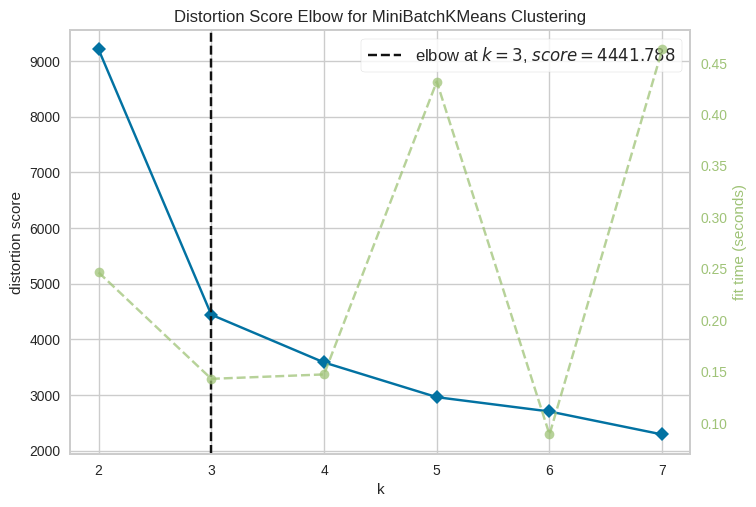

<Axes: title={'center': 'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(MiniBatchKMeans(), k=7)
Elbow_M.fit(rfm_df_scaled)
Elbow_M.show()

In [ ]:
#Determine the Optimal Number of Clusters

range_n_clusters = [3, 4, 5, 6, 7, 8]
silhouette_avg_scores = []

for num_clusters in range_n_clusters:
    minibatch_kmeans = MiniBatchKMeans(n_clusters=num_clusters, batch_size=100, max_iter=50, n_init=10)
    minibatch_kmeans.fit(rfm_df_scaled)
    cluster_labels = minibatch_kmeans.labels_
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print("For n_clusters={}, the silhouette score is {}".format(num_clusters, silhouette_avg))


For n_clusters=3, the silhouette score is 0.6276543598385277
For n_clusters=4, the silhouette score is 0.6102506559013354
For n_clusters=5, the silhouette score is 0.37438130653519086
For n_clusters=6, the silhouette score is 0.47891245965032514
For n_clusters=7, the silhouette score is 0.4009109469227273
For n_clusters=8, the silhouette score is 0.36986822772606087


In [ ]:
#Building the Final Model
optimal_clusters = range_n_clusters[np.argmax(silhouette_avg_scores)]
final_minibatch_kmeans = MiniBatchKMeans(n_clusters=optimal_clusters, batch_size=100, max_iter=50, n_init=10)
final_minibatch_kmeans.fit(rfm_df_scaled)


MiniBatchKMeans(batch_size=100, max_iter=50, n_clusters=3, n_init=10)

In [ ]:
#Assign Clusters to Data
rfm_df_scaled['Cluster_Id'] = final_minibatch_kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id,Cluster_Labels
0,12346.0,0.00,2,325,0,0
1,12347.0,4310.00,182,1,1,0
2,12348.0,1797.24,31,74,2,0
3,12349.0,1757.55,73,18,2,0
4,12350.0,334.40,17,309,0,0


In [ ]:
#Visualization for Mini-batch K-means

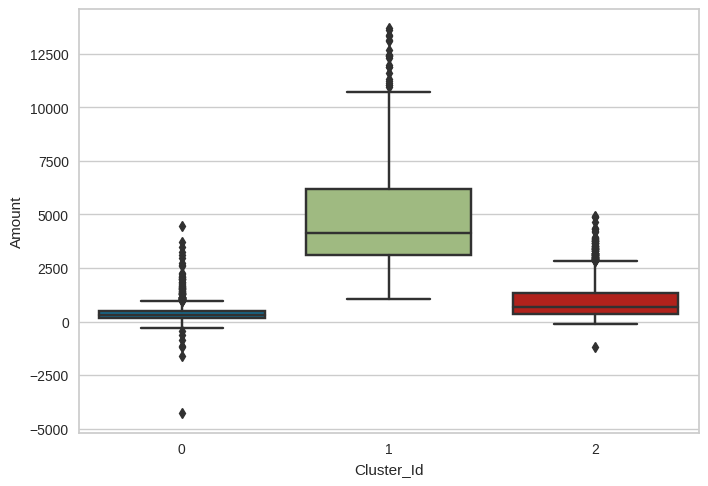

In [ ]:
#Box Plot for 'Amount' vs 'Cluster_Id'
sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)
plt.show()


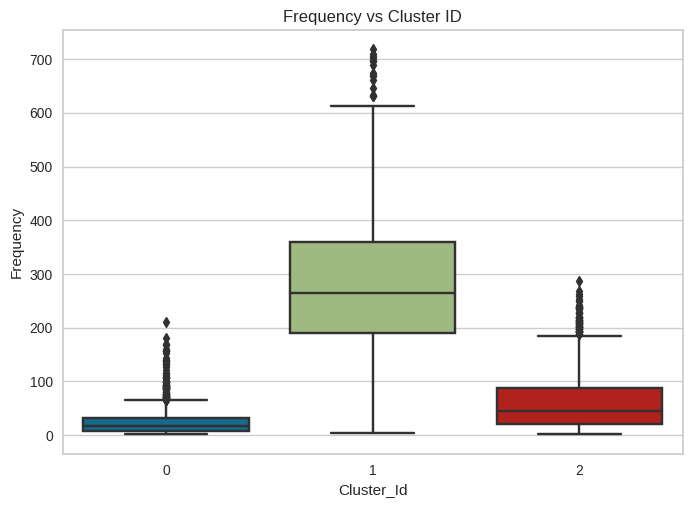

In [ ]:
#Box Plot for 'Frequency' vs 'Cluster_Id'
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)
plt.title('Frequency vs Cluster ID')
plt.show()


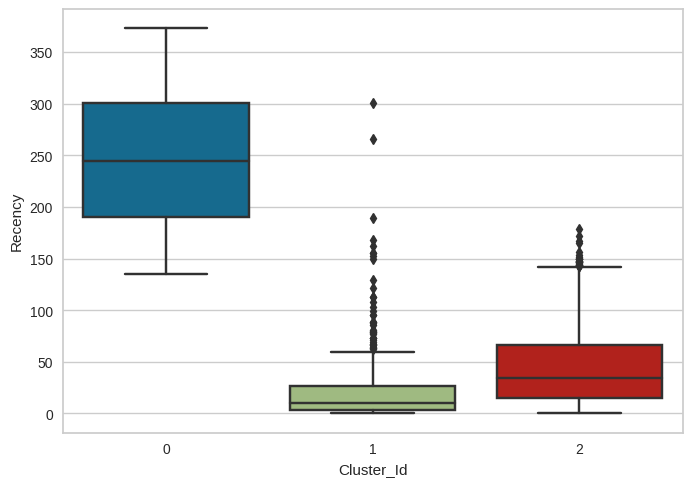

In [ ]:
#Box Plot for 'Recency' vs 'Cluster_Id'
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

plt.show()


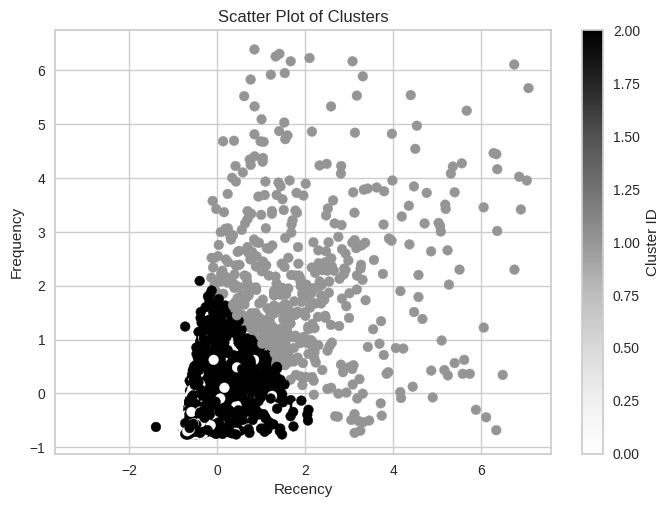

In [ ]:
# Assuming the first two columns of rfm_df_scaled are 'Recency' and 'Frequency'
plt.scatter(rfm_df_scaled.iloc[:, 0], rfm_df_scaled.iloc[:, 1], c=rfm['Cluster_Id'])
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Scatter Plot of Clusters')
plt.colorbar(label='Cluster ID')
plt.show()


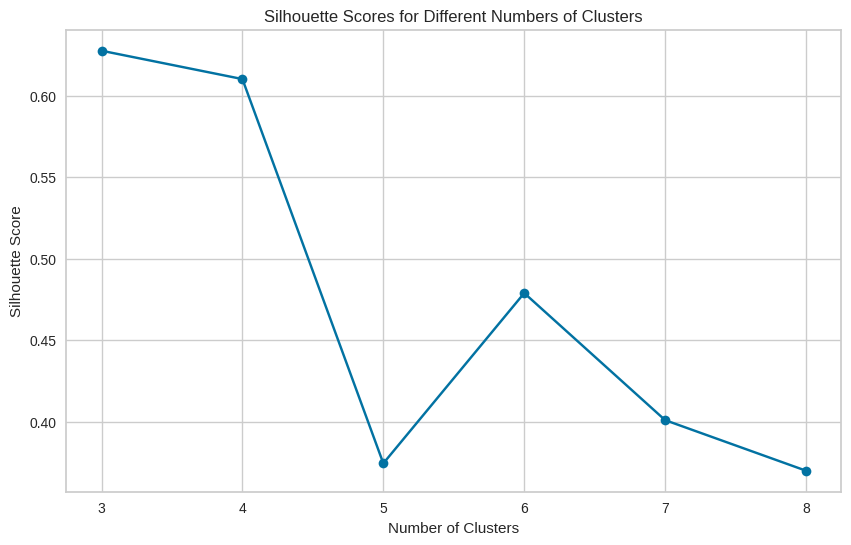

In [ ]:
#Silhouette Analysis

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

In [ ]:
from yellowbrick.cluster import KElbowVisualizer